In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#loading the Dataset

In [2]:
Insurance = pd.read_csv('insurance.csv')
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
Insurance.shape

(1338, 7)

In [4]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
Insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

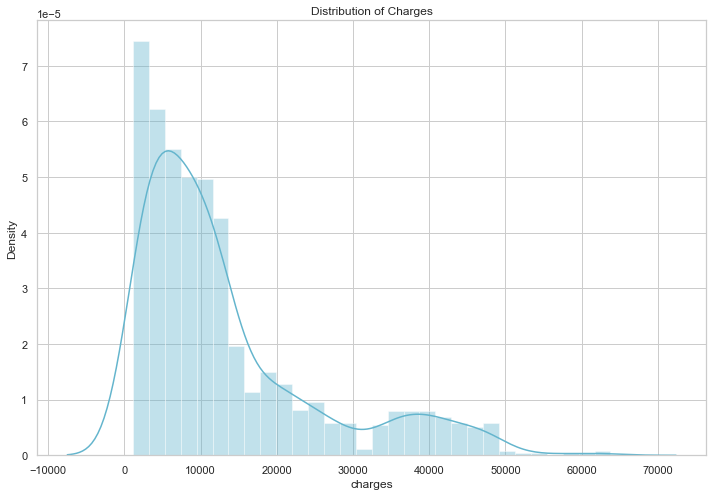

In [15]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(Insurance['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

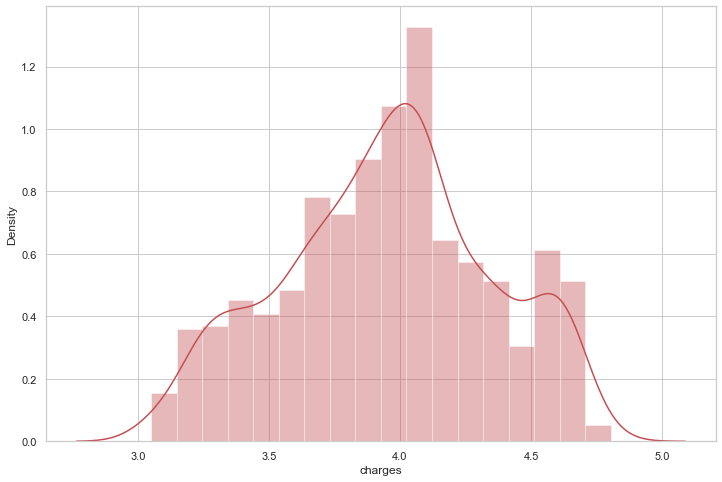

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(Insurance['charges']), kde = True, color = 'r' )

Now let's look at the charges by region

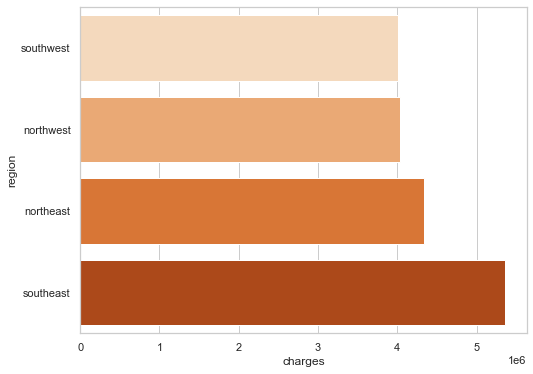

In [19]:
charges = Insurance['charges'].groupby(Insurance.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Oranges')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

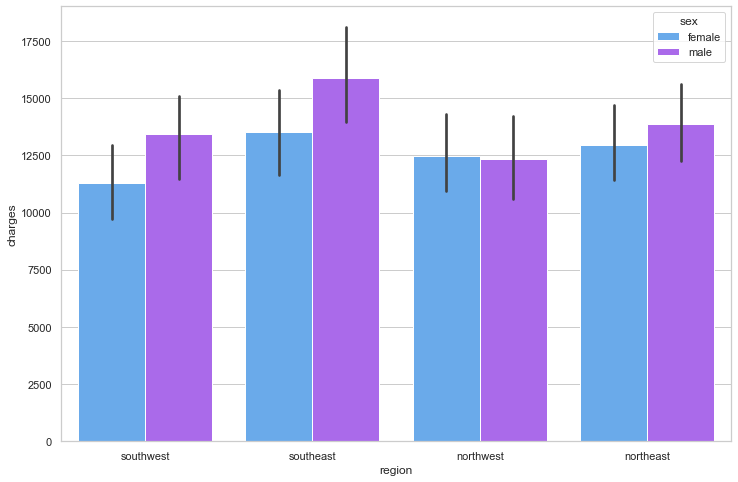

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=Insurance, palette='cool')


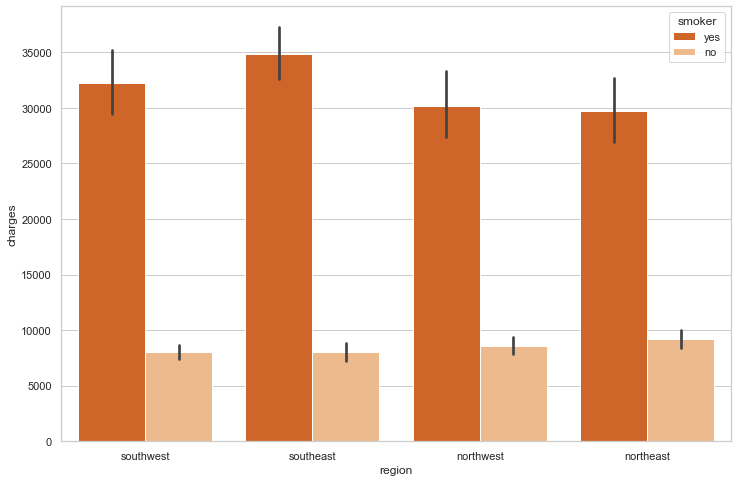

In [25]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=Insurance, palette='Oranges_r')

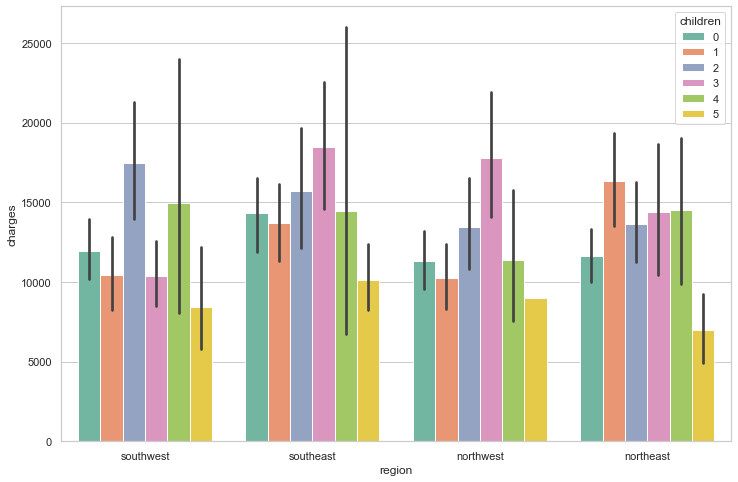

In [26]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=Insurance, palette='Set2')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

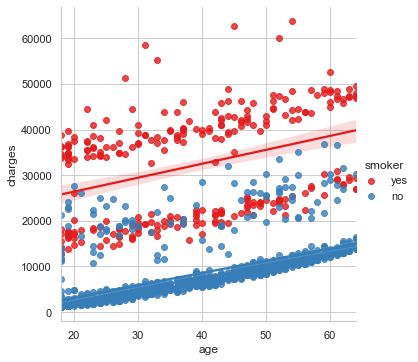

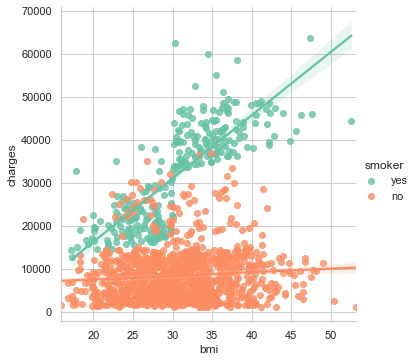

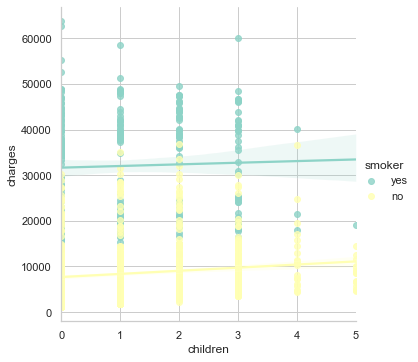

In [24]:
ax = sns.lmplot(x = 'age', y = 'charges', data=Insurance, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=Insurance, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=Insurance, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

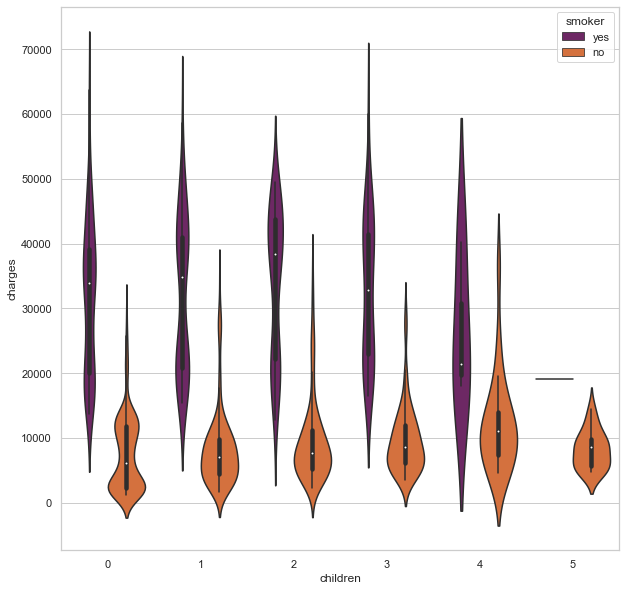

In [27]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=Insurance,
                 orient='v', hue='smoker', palette='inferno')

In [30]:
##Converting objects labels into categorical
Insurance[['sex', 'smoker', 'region']] = Insurance[['sex', 'smoker', 'region']].astype('category')
Insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [33]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(Insurance.sex.drop_duplicates())
Insurance.sex = label.transform(Insurance.sex)
label.fit(Insurance.smoker.drop_duplicates())
Insurance.smoker = label.transform(Insurance.smoker)
label.fit(Insurance.region.drop_duplicates())
Insurance.region = label.transform(Insurance.region)
Insurance.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

Linear Regression

In [39]:
from sklearn.model_selection import train_test_split as Holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = Insurance.drop(['charges'], axis = 1)
y = Insurance['charges']
x_train, x_test, y_train, y_test = Holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

-11661.983908824399
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [40]:
print(Lin_reg.score(x_test, y_test))

0.7998747145449959


The result we got is good enough

Another way to create the model and check its accuracy 

In [42]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [44]:
#fitting the training data
model.fit(x_train,y_train)


LinearRegression()

In [46]:
#Predictions
y_pred = model.predict(x_test)


In [47]:
#checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7998747145449959